<a href="https://colab.research.google.com/github/AKASH4671/AI-Driven-Credit-Risk-Prediction-and-Crisis-Resilience-Analysis/blob/main/05_Crisis_Overlay_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

**Load & Save dataset**

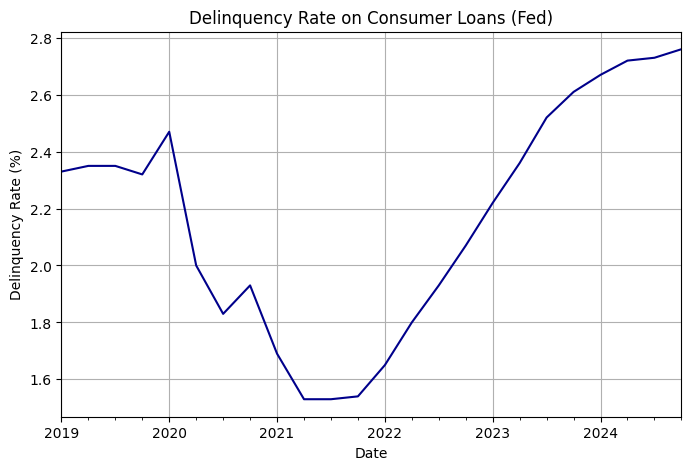

In [4]:
# Fed delinquency data from FRED
df_fed = web.DataReader('DRCLACBS', 'fred', start='2019-01-01', end='2024-12-31')

plt.figure(figsize=(8, 5))
df_fed['DRCLACBS'].plot(title='Delinquency Rate on Consumer Loans (Fed)', color='darkblue')
plt.ylabel('Delinquency Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Driven-Credit-Risk-Prediction-and-Crisis-Resilience-Analysis/images/fed_consumer_loan_delinquency.png', dpi=300)


**Comparison**

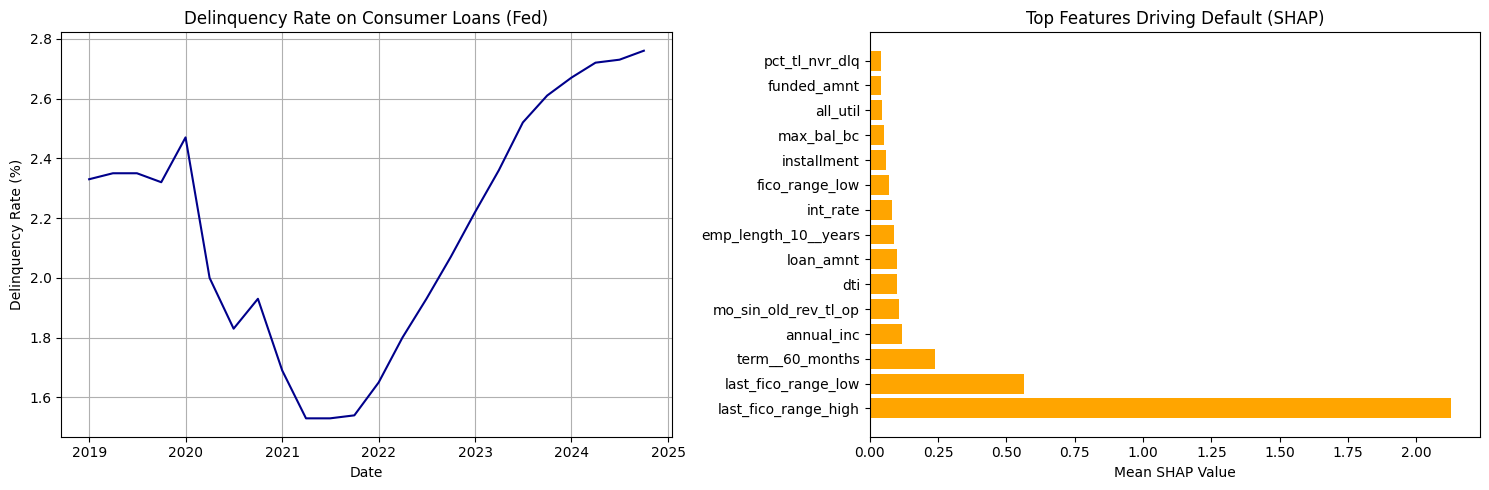

In [6]:
# Load SHAP summary
df_shap_summary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Driven-Credit-Risk-Prediction-and-Crisis-Resilience-Analysis/outputs/shap_feature_importance.csv')

# Sort SHAP summary by importance
df_shap_summary = df_shap_summary.sort_values('Mean_SHAP_Impact', ascending=True).tail(15)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1: Fed Delinquency Rate
axs[0].plot(df_fed.index, df_fed['DRCLACBS'], color='darkblue')
axs[0].set_title('Delinquency Rate on Consumer Loans (Fed)', fontsize=12)
axs[0].set_ylabel('Delinquency Rate (%)')
axs[0].set_xlabel('Date')
axs[0].grid(True)

# Subplot 2: Model SHAP Feature Importance
axs[1].barh(df_shap_summary['Feature'], df_shap_summary['Mean_SHAP_Impact'], color='orange')
axs[1].set_title('Top Features Driving Default (SHAP)', fontsize=12)
axs[1].set_xlabel('Mean SHAP Value')
axs[1].invert_yaxis()  # Highest SHAP on top

# Tight layout and save
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Finance Projects/AI-Driven-Credit-Risk-Prediction-and-Crisis-Resilience-Analysis/images/fed_vs_model_comparison.png', dpi=300)
plt.show()